In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import h5py

In [2]:
pred_res_path = 'counting_results/counting_num_07261737.h5'
gt_path = '../../violation_data/test/gp_violations_seg.h5'
pred_res = h5py.File(pred_res_path, 'r')
gp_gt = h5py.File(gt_path,'r')
print(pred_res.keys())
print(gp_gt.keys())

<KeysViewHDF5 ['pred_dmap_gplane']>
<KeysViewHDF5 ['count', 'density_maps', 'segment_maps']>


In [3]:
pred_gp = pred_res['pred_dmap_gplane']
gt = gp_gt['segment_maps']

In [4]:
pred_gp = np.array(pred_gp)
gt = np.array(gt)

In [5]:
print(pred_gp.shape)
print(gt.shape)

(200, 1, 768, 640, 1)
(200, 768, 640, 1)


In [6]:
pred_gp = np.squeeze(pred_gp)
gt = np.squeeze(gt)

In [7]:
print(pred_gp.shape)

(200, 768, 640)


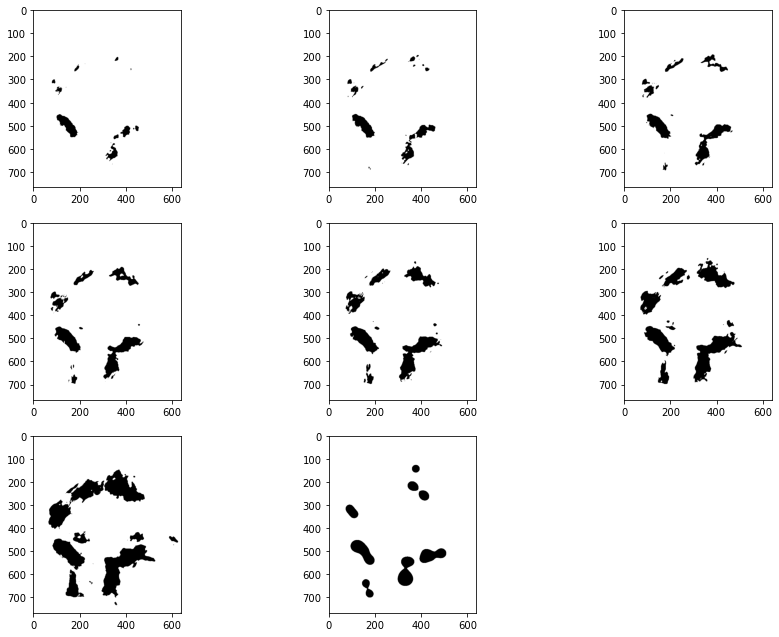

In [8]:
#print(pred_gp[10].min())
plt.figure(figsize=(15,15))
range_ = np.arange(0.3,1,0.1)
index = 1
for i in range_:
    #print(i)
    img = pred_gp[10].copy()
    #print(img.min())
    img[img<i] =0
    img[img>i] =1
    plt.subplot(4,3,index)
    plt.imshow(img,cmap='gray')
    index+=1
plt.subplot(4,3,index)
plt.imshow(gt[10],cmap='gray')